In [1]:
from ipymesh import PSLGEditor
from proteus import Domain

class PSLG_DomainEditor(PSLGEditor, Domain.PlanarStraightLineGraphDomain):
    def __init__(self, *args, **kwargs):
        super(PSLG_DomainEditor, self).__init__(*args, **kwargs)


In [2]:
deditor = PSLG_DomainEditor(vertices=[(0.1,0.1),
                              (0.1,0.9),
                              (0.9,0.9)],
                   vertexFlags=[1,1,1],
                   segments=[(0,1),
                             (1,2),
                             (0,2)],
                   segmentFlags=[1,1,1],
                   regions=[(0.4,0.75)],
                   regionFlags=[1],
                   regionTypes=[1,2,0],
                   boundaryTypes=[1,2,0],
                           polyfile=None,
                           regionConstraints=None)
deditor

In [3]:
from proteus import TriangleTools
deditor.writePoly('mesh')
tmesh = TriangleTools.TriangleBaseMesh(baseFlags='VApq30Dena{0:f}'.format(0.1),
                                       nbase=1,
                                       verbose=10)
tmesh.readFromPolyFile(deditor.polyfile)
tmesh.writeToFile(deditor.polyfile)
mesh=tmesh.convertToProteusMesh(verbose=1)

<IPython.core.display.Javascript object>


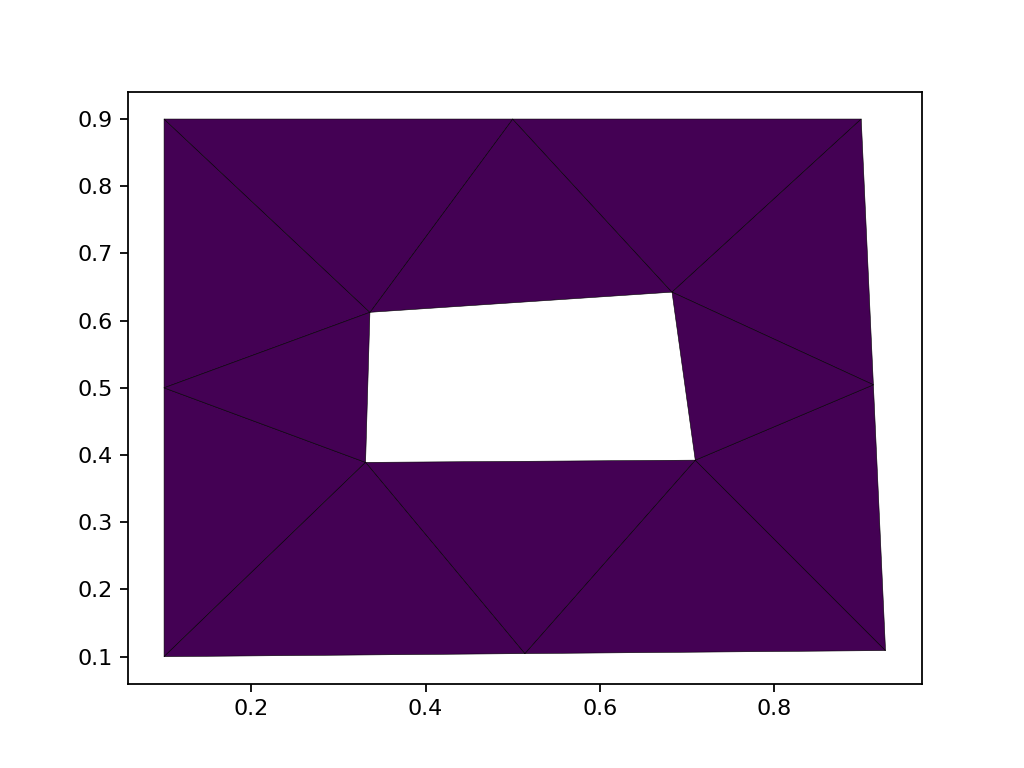

In [4]:
from matplotlib import pyplot as plt
%matplotlib notebook
plt.figure()
plt.tripcolor(mesh.nodeArray[:,0],
              mesh.nodeArray[:,1],
              mesh.elementNodesArray,
              edgecolors='k',
              facecolors=mesh.elementMaterialTypes)